In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,25)
import contextily as cx
import numpy as np


In [33]:
gdf = pd.read_csv('../data/570_trafikkulykke-eksport.csv', delimiter = ';',low_memory=False)

In [4]:
kolonner_i_datasettet = gdf.columns.values.tolist()
print(kolonner_i_datasettet)

['VEGOBJEKT-ID', 'TYPE-ID', 'VERSJON', 'FØRSTE FOREKOMST', 'STARTDATO', 'SLUTTDATO', 'SIST MODIFISERT', 'ALTERNATIV UHELLSKODE', 'ALVORLIGHETSGRAD', 'ANMELDELSESNUMMER', 'ANTALL ALVORLIG SKADET (STK)', 'ANTALL ANDRE ENHETER (NY) (STK)', 'ANTALL BUSS (NY) (STK)', 'ANTALL DREPTE I ULYKKEN (STK)', 'ANTALL ENHETER (STK)', 'ANTALL FOTGJENGERE (NY) (STK)', 'ANTALL KJØREFELT (STK)', 'ANTALL LASTEBIL (NY) (STK)', 'ANTALL LETT MC (NY) (STK)', 'ANTALL LETTERE SKADET (STK)', 'ANTALL MC (NY) (STK)', 'ANTALL MEGET ALVORLIG SKADET (STK)', 'ANTALL MOPED (NY) (STK)', 'ANTALL PERSONBIL (NY) (STK)', 'ANTALL SKINNEGÅENDE MATERIELL (NY) (STK)', 'ANTALL SYKKEL (NY) (STK)', 'ANTALL TRAKTOR (NY) (STK)', 'ANTALL UKJENTE ENHETER (NY) (STK)', 'ANTALL VAREBIL (NY) (STK)', 'ATK, INFLUENSSTREKNING (NY)', 'BESKRIVELSE', 'DEKKETYPE', 'FARTSDEMPENDE TILTAK (NY)', 'FARTSGRENSE (KM/H)', 'FORSTERKET VEGOPPMERKING', 'FYLKENAVN (NY)', 'FYLKENUMMER (NY)', 'FØREFORHOLD', 'GEOMETRI, PUNKT', 'HISTORISK ARM (NY)', 'HISTORISK H

In [5]:
gdf['ÅR (NY)'].describe()

count    290392.000000
mean       1997.979114
std          11.067840
min        1977.000000
25%        1989.000000
50%        1998.000000
75%        2007.000000
max        2020.000000
Name: ÅR (NY), dtype: float64

In [32]:
gs = geopandas.GeoSeries.from_wkt(gdf['GEOMETRI'])
#Lager geometri kolonne og setter riktig referansesystem
gdf = geopandas.GeoDataFrame(gdf, geometry=gs, crs="EPSG:5973")
# Konverterer koordinatene til samme format som kartet som vi henter eksternt
gdf = gdf.to_crs(epsg=3857)
# Sletter dataframes for å frigjør plass i minne
#del(df)
del(gs)
#ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#cx.add_basemap(ax)

KeyboardInterrupt: 

<AxesSubplot:xlabel='FARTSGRENSE (KM/H)'>

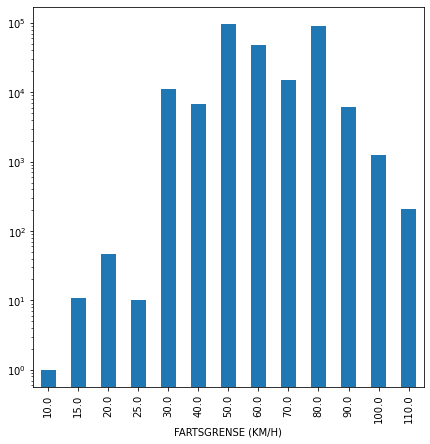

In [7]:
gdf_guppert_fartsgrense = gdf.groupby("FARTSGRENSE (KM/H)")["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(7,7), logy=True)

<AxesSubplot:ylabel='Frequency'>

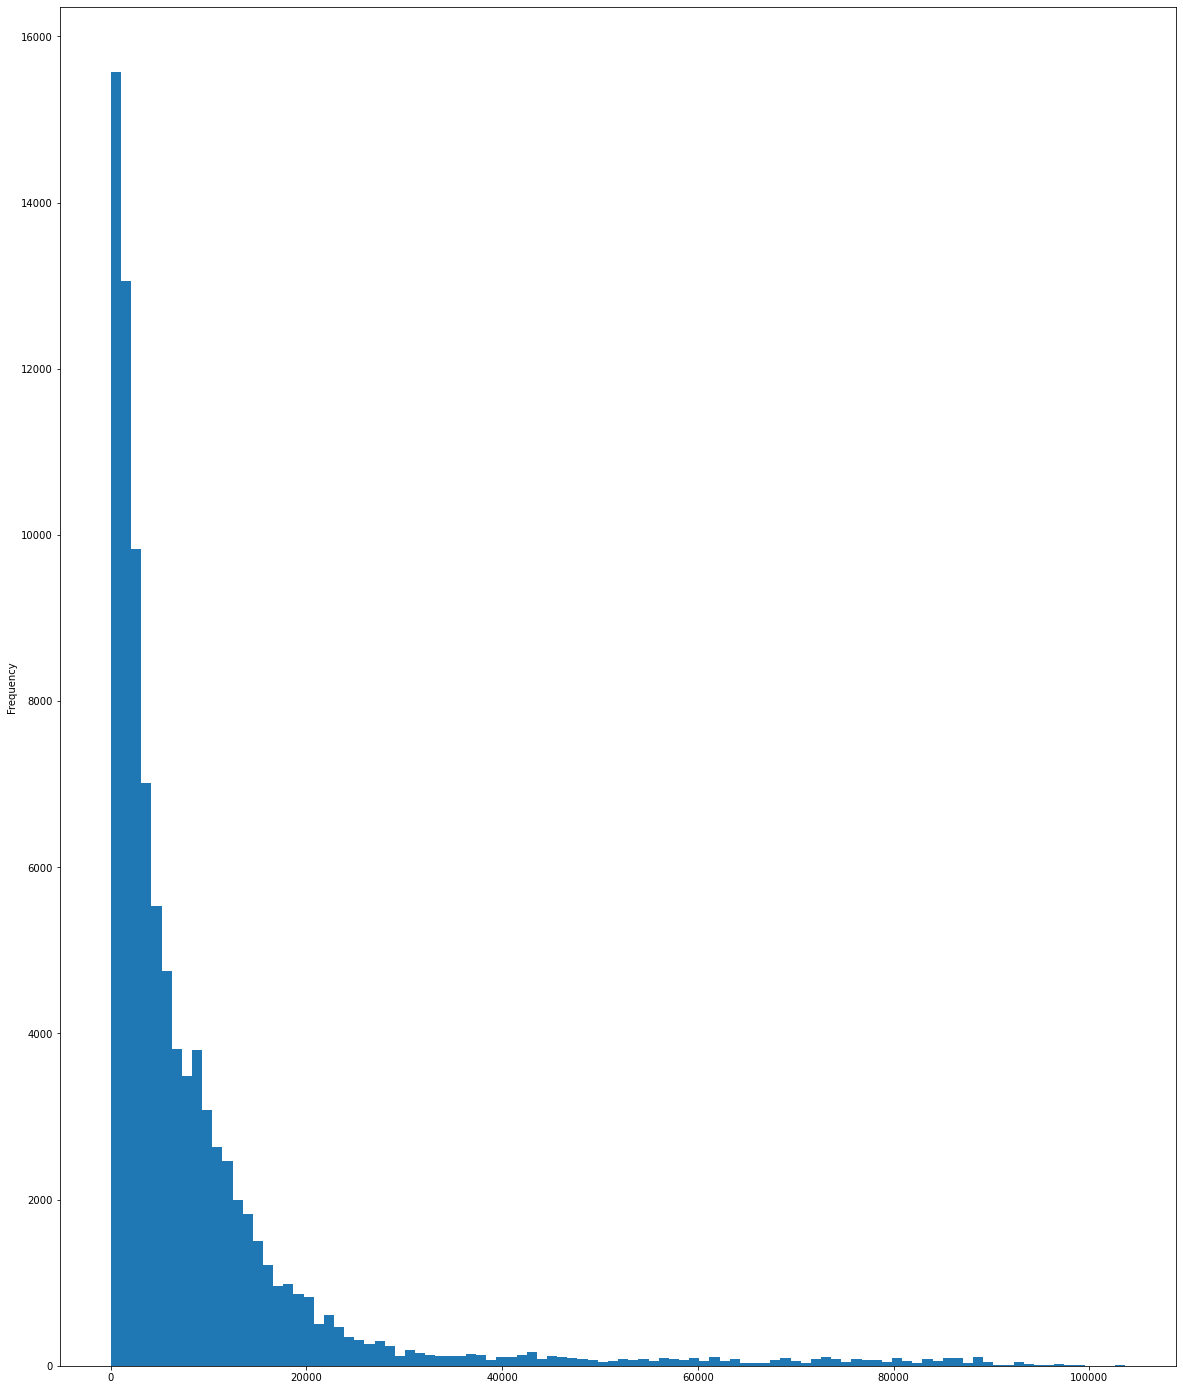

In [8]:
gdf["ÅDT (NY)"].plot(kind="hist", bins=100)

In [9]:
gdf["ÅDT (NY)"][gdf["ÅDT (NY)"]<100]

gdf["ÅDT (NY)"].fillna(0, inplace=True)

bins = [0, 100, 250, 1000, 20000]
names = ['Boliggate', 'Landeveg', 'Transportveg', 'Hoytrafikert']
d = dict(enumerate(names, 1))

gdf['AADT range'] = np.vectorize(d.get)(np.digitize(gdf["ÅDT (NY)"], bins))
gdf['AADT range']

0         Transportveg
1         Hoytrafikert
2         Transportveg
3         Transportveg
4         Hoytrafikert
              ...     
290447    Hoytrafikert
290448    Hoytrafikert
290449    Transportveg
290450       Boliggate
290451       Boliggate
Name: AADT range, Length: 290452, dtype: object

<AxesSubplot:xlabel='AADT range,FARTSGRENSE (KM/H)'>

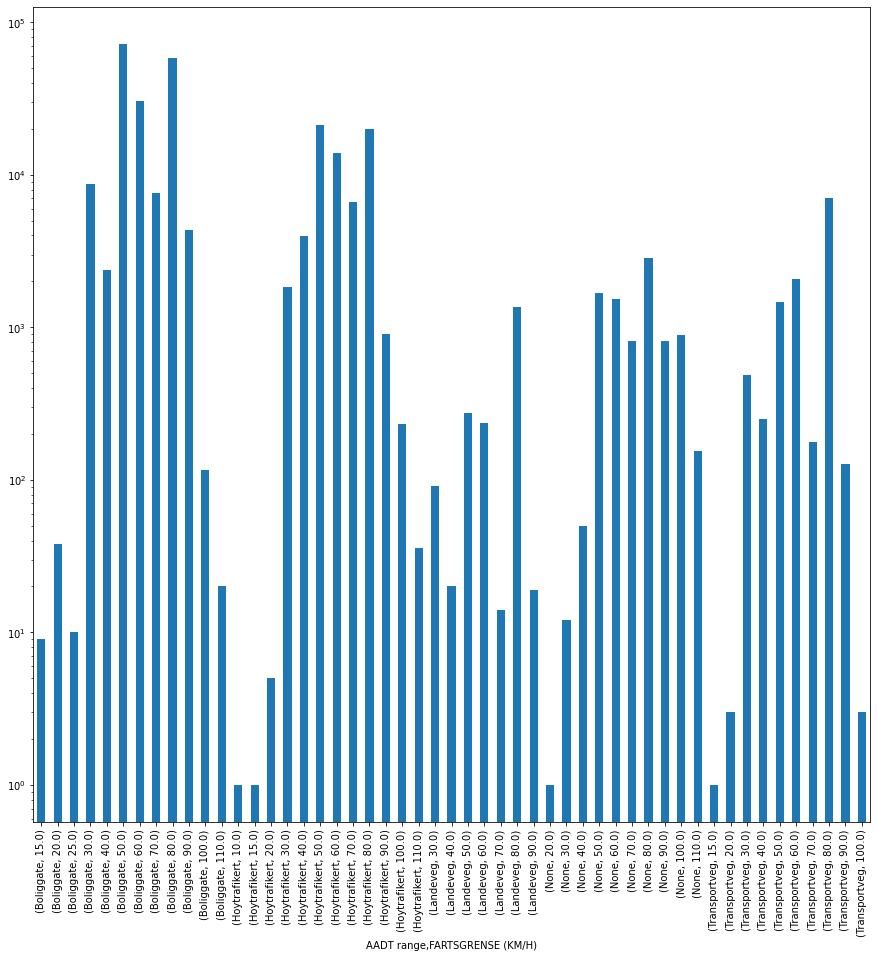

In [10]:
gdf_guppert_fartsgrense = gdf.groupby(['AADT range', "FARTSGRENSE (KM/H)"])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(15,15), logy=True)

In [11]:
gdf['FØREFORHOLD'].describe()
gdf.groupby('FØREFORHOLD')["VEGOBJEKT-ID"].count()


FØREFORHOLD
Delvis snø / isbelagt veg     17869
Glatt ellers                   4960
Snø / isbelagt veg            40554
Tørr, bar veg                152971
Ukjent                        10947
Våt, bar veg                  62305
Name: VEGOBJEKT-ID, dtype: int64

In [12]:
gdf['LYSFORHOLD'].describe()
gdf.groupby('LYSFORHOLD')["VEGOBJEKT-ID"].count()


LYSFORHOLD
Dagslys                    195184
Mørkt med vegbelysning      45452
Mørkt uten vegbelysning     26429
Tussmørke, skumring         15819
Ukjent                       1953
Name: VEGOBJEKT-ID, dtype: int64

In [13]:

gdf['ANTALL ENHETER (STK)'].describe()
gdf.groupby('ANTALL ENHETER (STK)')["VEGOBJEKT-ID"].count()

ANTALL ENHETER (STK)
1.0      89195
2.0     179731
3.0      17250
4.0       3260
5.0        701
6.0        183
7.0         69
8.0         21
9.0         15
10.0         9
11.0         6
14.0         2
15.0         2
17.0         1
18.0         1
20.0         3
26.0         1
29.0         1
Name: VEGOBJEKT-ID, dtype: int64

In [14]:
gdf[gdf['ANTALL ENHETER (STK)']==26]

,VEGOBJEKT-ID,TYPE-ID,VERSJON,FØRSTE FOREKOMST,STARTDATO,SLUTTDATO,SIST MODIFISERT,ALTERNATIV UHELLSKODE,ALVORLIGHETSGRAD,ANMELDELSESNUMMER,...,TIL METER,VEGLENKESEKVENSID,STARTPOSISJON,SLUTTPOSISJON,RETNING,SIDEPOSISJON,TYPEVEG,GEOMETRI,geometry,AADT range
65345,83395373,570.0,1.0,1.0,2001-02-28,NaN,2021-09-08T22:10:36,NaN,NaN,NaN,...,"11466,975",443151.0,"0,50307896","0,50307896",NaN,NaN,enkelBilveg,POINT Z(260089.688 6625664.1 40.552),POINT Z (1195067.070 8333144.869 79.568),Boliggate


<AxesSubplot:xlabel='VÆRFORHOLD,ÅR (NY)'>

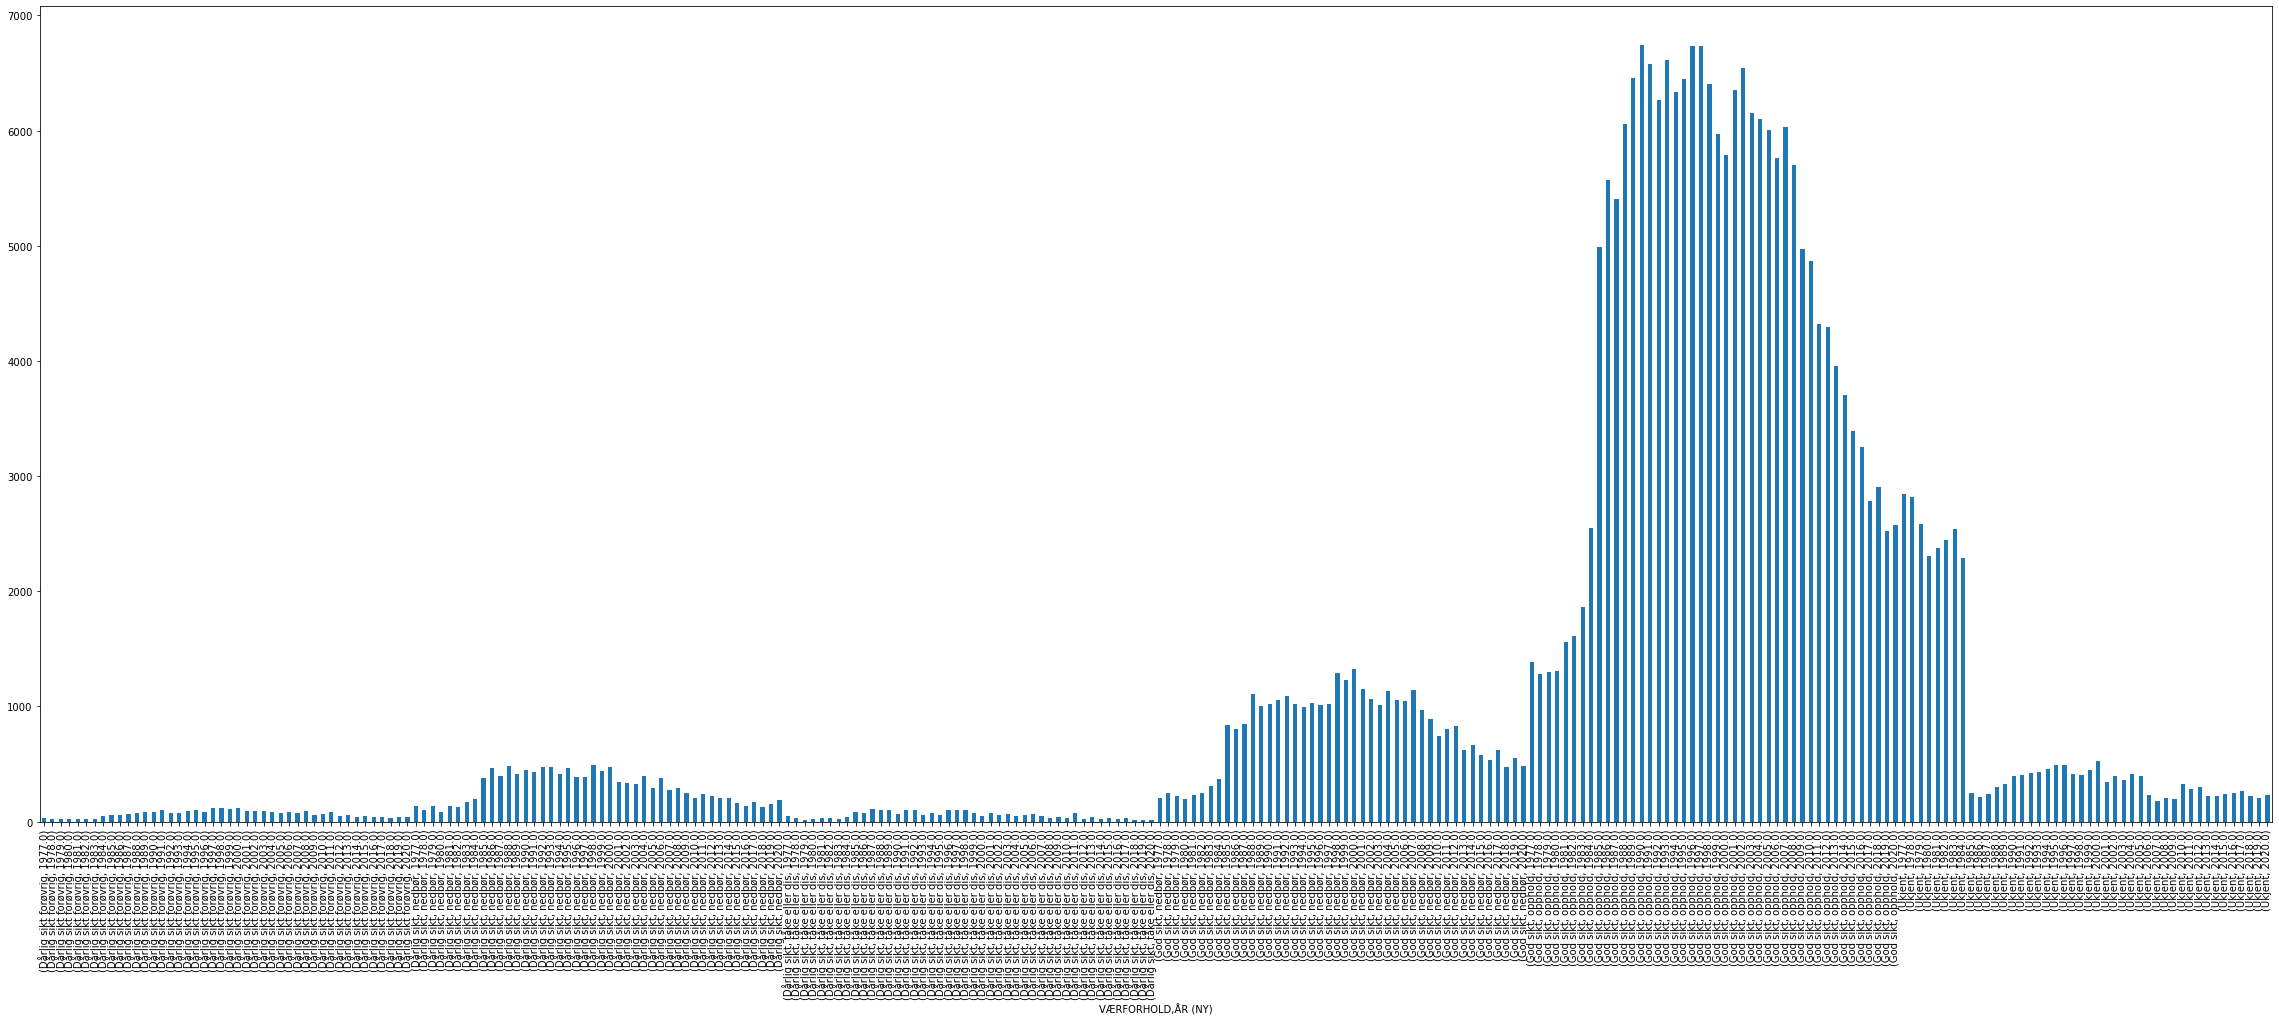

In [16]:
gdf['ÅR (NY)']
gdf_guppert_fartsgrense = gdf.groupby(['VÆRFORHOLD', 'ÅR (NY)'])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(40,15))


# Ulykker pr kurvatur

In [20]:
import geopandas as gpd
import numpy as np
import nvdbapiv3 as nvdb
from nvdbapiv3 import nvdb2geojson


def get_data_from_vegkart(dataNumber, filterString):
    """Uses NVDB API to load data from SVVs Vegkart into a Geopandas DataFrame.    
    """
    data = nvdb.nvdbFagdata(dataNumber) # Trafikkregistreringsstasjoner
    if filterString != "":
        data.filter({"vegsystemreferanse": filterString})
    data_geo = nvdb2geojson.fagdata2geojson(data)
    df = gpd.GeoDataFrame.from_features(data_geo['features'])
    df.set_crs(epsg=25833)
    return df


#kurve = get_data_from_vegkart(639,"EV6KS148D1M3000")
#kurve["Radius"]#.head()

In [22]:
alleUlykker = get_data_from_vegkart(570,"EV16")
alleUlykker.columns

Index(['geometry', 'Geometri, punkt', 'Regulering gangfelt (Ny)',
       'Regulering vegkryss (Ny)', 'UID (Ny)', 'Ukedagstype (Ny)',
       'Ulykkestype (Ny)', 'Ulykkestype underkategori (Ny)', 'År (Ny)',
       'Antall Andre enheter (Ny)', 'Antall Buss (Ny)',
       'Antall Fotgjengere (Ny)', 'Antall Lastebil (Ny)',
       'Antall Lett MC (Ny)', 'Antall MC (Ny)', 'Antall Moped (Ny)',
       'Antall Personbil (Ny)', 'Antall Skinnegående materiell (Ny)',
       'Antall Sykkel (Ny)', 'Antall Traktor (Ny)',
       'Antall Ukjente enheter (Ny)', 'Antall Varebil (Ny)', 'ÅDT (Ny)',
       'ATK, influensstrekning (Ny)', 'Fartsdempende tiltak (Ny)',
       'Vegbelysning (Ny)', 'Historisk Arm (Ny)',
       'Historisk Trafikantgruppe (Ny)', 'Historisk Vegfase (Ny)',
       'Historisk vegstatus', 'Ukedag', 'Ulykkesdato', 'Ulykkesklokkeslett',
       'Ulykkeskode', 'Antall enheter', 'Vegtype', 'Stedsforhold', 'Dekketype',
       'Føreforhold', 'Værforhold', 'Lysforhold', 'Kjørefelttype',
       'A

In [41]:
alleUlykker['kortform'][0]

'EV16 S15D1 m2924'

In [24]:
def get_value_from_vegkart(dataNumber, filterString):
    """Uses NVDB API to load data from SVVs Vegkart into a Geopandas DataFrame.    
    """
    data = nvdb.nvdbFagdata(dataNumber) # Trafikkregistreringsstasjoner
    if filterString != "":
        data.filter({"vegsystemreferanse": filterString})
    obj = data.nesteNvdbFagObjekt()
    if obj != None:
        radius = obj.egenskapverdi("Radius")
        return radius
    else:
        return np.NaN

In [25]:
from tqdm.notebook import tqdm, trange

kurveListe = []
for i in tqdm(range(alleUlykker['kortform'].count())): #alleUlykker['kortform'].count():
    kurveListe.append(get_value_from_vegkart(639,alleUlykker['kortform'][i]))

#kurveListe

# hent ut alle kurvatur på e8? :(

  0%|          | 0/4700 [00:00<?, ?it/s]

In [26]:
alleUlykker['kortform'][478]

'EV16 S42D1 m5579'

In [27]:
alleUlykker["kurveRadius"] = kurveListe

In [28]:
alleUlykker["kurveRadius"] = alleUlykker["kurveRadius"].abs()

In [29]:
alleUlykker["Historisk Vegstrekning (Ny)"].unique()

array([nan,  6.,  4., 59., 65., 66., 52., 51., 47., 18., 15., 67., 31.,
       58., 55., 48., 22., 14., 57., 46., 63., 17., 53., 29., 36., 40.,
       23.])

In [31]:
# Her lager vi grupper av radiuser basert på N100
bins = [0, 250,275,300,350,400,500,550,600,700,800,900,1000,1200,1400,1600,1750,9998]
names = ['0-200', '250-274','275-299','300-349','350-399','400-499','500-549','550-599','600-699','700-799','800-899','900-999','1000-1199','1200-1399','1400-1599','1600-1749','>1750','rett']
d = dict(enumerate(names, 1))

alleUlykker['Kurve range'] = np.vectorize(d.get)(np.digitize(alleUlykker["kurveRadius"], bins))


In [32]:
alleUlykker.head()

,geometry,"Geometri, punkt",Regulering gangfelt (Ny),Regulering vegkryss (Ny),UID (Ny),Ukedagstype (Ny),Ulykkestype (Ny),Ulykkestype underkategori (Ny),År (Ny),Antall Andre enheter (Ny),Antall Buss (Ny),Antall Fotgjengere (Ny),Antall Lastebil (Ny),Antall Lett MC (Ny),Antall MC (Ny),Antall Moped (Ny),Antall Personbil (Ny),Antall Skinnegående materiell (Ny),Antall Sykkel (Ny),Antall Traktor (Ny),Antall Ukjente enheter (Ny),Antall Varebil (Ny),ÅDT (Ny),"ATK, influensstrekning (Ny)",Fartsdempende tiltak (Ny),Vegbelysning (Ny),Historisk Arm (Ny),Historisk Trafikantgruppe (Ny),Historisk Vegfase (Ny),Historisk vegstatus,Ukedag,Ulykkesdato,Ulykkesklokkeslett,Ulykkeskode,Antall enheter,Vegtype,Stedsforhold,Dekketype,Føreforhold,Værforhold,Lysforhold,Kjørefelttype,Antall kjørefelt,Tettsted,Vegbredde,Kommunenr SSB,Fartsgrense,Temperatur,Forsterket vegoppmerking,Måned (Ny),Historisk vegkategori,Historisk vegnummer,Fylkenavn (Ny),Historisk hp,Fylkenummer (Ny),Historisk kilometerverdi,Kommunenavn (Ny),Kommunenummer (Ny),id,metadata,antall vegsegmenter,vegsegment nr,vegsystem,strekning,kortform,veglenkesekvensid,relativPosisjon,retning,veglenkeType,detaljnivå,typeVeg,typeVeg_sosi,startdato,kommune,fylke,Stedfestingens nøyaktighet,Midtdeler,sluttdato,kryssystem,sideanlegg,Historisk Meterverdi (Ny),Historisk Vegdelstrekning (Ny),Historisk Vegstrekning (Ny),Historisk Kryssdel (Ny),Historisk Kryssdel meterverdi (Ny),Vinterdriftsklasse (Ny),kurveRadius,Kurve range
0,POINT Z (53482.835 6774996.674 66.983),POINT (53483 6774996),Ukjent,Ukjent,UID1000000002,Helgedøgn,Motsatt kjøreretning,Ulykke ved møting,2006,0,0,0,0,0,0,0,2,0,0,0,0,0,1950.0,Nei,Ukjent,Nei,Nei,K,V,Eksisterende veg,Søndag,2006-03-05,19:29,Møting på rett vegstrekning,2,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,"Asfalt, oljegrus",Snø / isbelagt veg,"God sikt, nedbør",Mørkt med vegbelysning,Vanlig kjørefelt,2.0,Ikke tettsted,6.5,4641,80.0,6.0,Ukjent,3,Europaveg,16.0,Vestland,9.0,46,4930.0,Aurland,4641,78639818,"{'type': {'id': 570, 'navn': 'Trafikkulykke'},...",1,1,"{'id': 1002130292, 'versjon': 1, 'vegkategori'...","{'id': -1, 'versjon': -1, 'strekning': 15, 'de...",EV16 S15D1 m2924,384014,0.354015,MED,HOVED,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-10-20,4641,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485.0,400-499
1,POINT Z (101879.456 6790434.153 71.362),POINT (101875 6790434),Ukjent,Ukjent,UID1000000170,Yrkesdøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2005,0,0,0,0,0,0,0,0,0,0,0,0,1,1780.0,Nei,Ukjent,Nei,Nei,K,V,Eksisterende veg,Tirsdag,2005-02-22,09:00,Enslig kjøretøy kjørte utfor på venstre side p...,1,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,Vanlig kjørefelt,2.0,Ikke tettsted,6.0,4642,60.0,5.0,Ukjent,2,Europaveg,16.0,Vestland,4.0,46,5253.0,Lærdal,4642,78640556,"{'type': {'id': 570, 'navn': 'Trafikkulykke'},...",1,1,"{'id': 1002129901, 'versjon': 1, 'vegkategori'...","{'id': -1, 'versjon': -1, 'strekning': 22, 'de...",EV16 S22D1 m6272,384008,0.424419,MED,HOVED,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-10-20,4642,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,rett
2,POINT Z (101166.109 6790619.623 65.133),POINT (101165 6790620),Ukjent,Ukjent,UID1000000171,Yrkesdøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2005,0,0,0,1,0,0,0,0,0,0,0,0,0,1780.0,Nei,Ukjent,Nei,Nei,K,V,Eksisterende veg,Onsdag,2005-02-16,00:40,Enslig kjøretøy kjørte utfor på venstre side i...,1,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Mørkt uten vegbelysning,Vanlig kjørefelt,2.0,Ikke tettsted,8.6,4642,80.0,7.0,Ukjent,2,Europaveg,16.0,Vestland,4.0,46,6010.0,Lærdal,4642,78640559,"{'type': {'id': 570, 'navn': 'Trafikkulykke'},...",1,1,"{'id': 1002129901, 'versjon': 1, 'vegkategori'...","{'id': -1, 'versjon': -1, 'strekning': 22, 'de...",EV16 S22D1 m5511,384008,0.501864,MED,HOVED,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,

<AxesSubplot:ylabel='Frequency'>

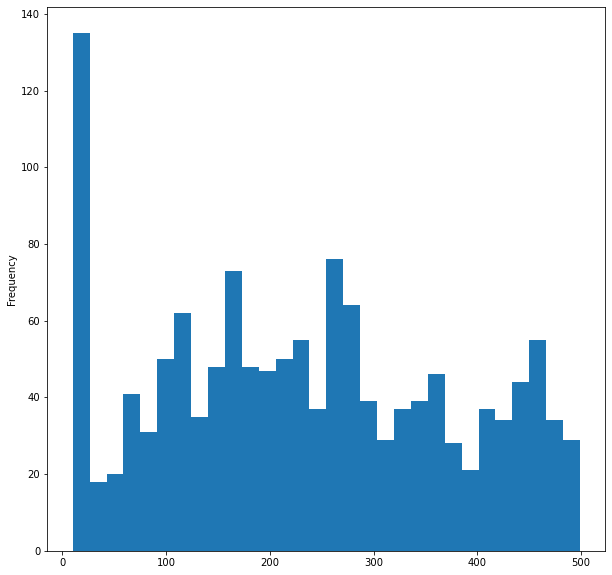

In [42]:
alleUlykker[(alleUlykker["kurveRadius"]<500) & (alleUlykker["kurveRadius"]>-500)]["kurveRadius"].plot(kind="hist", bins=30,figsize=(10,10),by=alleUlykker["id"])

<AxesSubplot:ylabel='Frequency'>

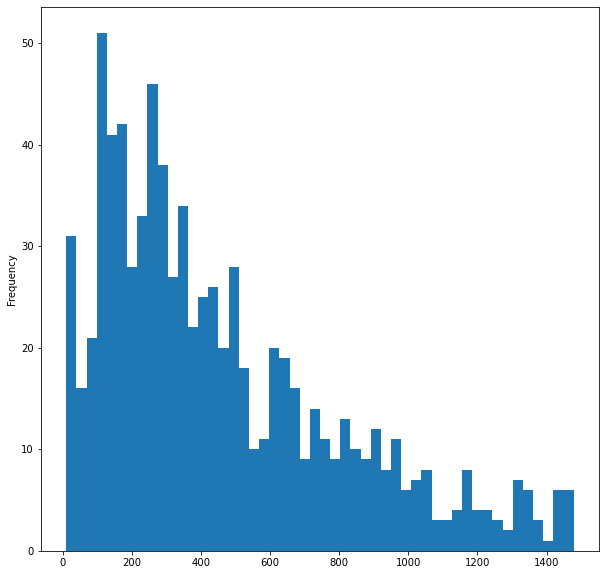

In [55]:
alleUlykker[(alleUlykker["Ulykkestype (Ny)"]=="Utforkjøring") & (alleUlykker["kurveRadius"]<1500)]["kurveRadius"].plot(kind="hist", bins=50,figsize=(10,10),by=alleUlykker["id"])

<AxesSubplot:ylabel='Frequency'>

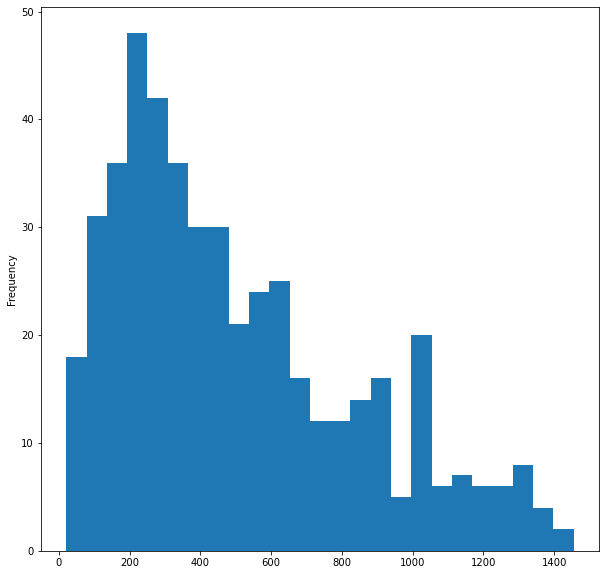

In [60]:
alleUlykker[(alleUlykker["Ulykkestype (Ny)"]=="Motsatt kjøreretning") & (alleUlykker["kurveRadius"]<1500)]["kurveRadius"].plot(kind="hist", bins=25,figsize=(10,10),by=alleUlykker["id"])

In [39]:
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
grupperte_ulykker = alleUlykker.groupby(["Kurve range", "Fartsgrense"])
#grupperte_ulykker = alleUlykker.groupby(["Ulykkestype (Ny)", "Kurve range", "Fartsgrense"])
#grupperte_ulykker = alleUlykker.groupby(["Ulykkestype (Ny)",  "ATK, influensstrekning (Ny)"])

#grupperte_ulykker = alleUlykker.groupby(["Kurve range"])


grupperte_ulykker['UID (Ny)'].count().loc[names]

Kurve range  Fartsgrense
0-200        30.0              7
             40.0              2
             50.0            181
             60.0            195
             70.0             34
             80.0            309
             90.0              5
250-274      30.0              6
             50.0             15
             60.0              9
             70.0              5
             80.0             62
             100.0             2
275-299      50.0             19
             60.0             14
             70.0              6
             80.0             44
300-349      50.0              1
             60.0             10
             70.0             11
             80.0             87
350-399      30.0              1
             50.0              1
             60.0             13
             70.0             11
             80.0             71
400-499      30.0              1
             50.0             32
             60.0             25
             70.0 

In [61]:
pd.crosstab(alleUlykker["Kurve range"], alleUlykker['Lysforhold'])

Lysforhold,Dagslys,Mørkt med vegbelysning,Mørkt uten vegbelysning,"Tussmørke, skumring",Ukjent
Kurve range,,,,,
0-200,508,95,80,40,0
1000-1199,77,31,16,6,2
1200-1399,72,16,8,6,0
1400-1599,46,4,7,4,0
1600-1749,40,16,3,8,0
250-274,64,18,8,7,0
275-299,47,13,12,8,0
300-349,81,1,21,5,1
350-399,64,10,14,6,1


In [46]:
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
df_kurver = pd.read_csv('../data/639_kurvatur_e16.csv', delimiter= ';', decimal = ',')

# Her lager vi grupper av radiuser basert på N100
bins = [0, 250,275,300,350,400,500,550,600,700,800,900,1000,1200,1400,1600,1750,9998]
names = ['0-249', '250-274','275-299','300-349','350-399','400-499','500-549','550-599','600-699','700-799','800-899','900-999','1000-1199','1200-1399','1400-1599','1600-1749','>1750','rett']
d = dict(enumerate(names, 1))
df_kurver["RADIUS (M)"] = df_kurver["RADIUS (M)"].abs()
df_kurver['Kurve range'] = np.vectorize(d.get)(np.digitize(df_kurver["RADIUS (M)"], bins))


df_kurver

,VEGOBJEKT-ID,TYPE-ID,VERSJON,FØRSTE FOREKOMST,STARTDATO,SLUTTDATO,SIST MODIFISERT,BEREGNINGSINFO,"GEOMETRI, HJELPELINJE",KLOTOIDEPARAMETER,...,FRA METER,TIL METER,VEGLENKESEKVENSID,STARTPOSISJON,SLUTTPOSISJON,RETNING,SIDEPOSISJON,TYPEVEG,GEOMETRI,Kurve range
0,324021113,639.0,1.0,1.0,2012-03-20,NaN,2021-11-17T14:17:04,"bd=20120320, kv=7.0.0.50",NaN,NaN,...,2238.109,2238.109,1773669.0,0.000000,0.050043,WITH,NaN,rampe,"LINESTRING Z(246679.02 6651366.04 51.56, 24667...",rett
1,324021113,639.0,1.0,0.0,2012-03-20,NaN,2021-11-17T14:17:04,"bd=20120320, kv=7.0.0.50",NaN,NaN,...,2238.109,2238.109,1773669.0,0.050043,0.058582,WITH,NaN,rampe,"LINESTRING Z(246674.537 6651388.329 50, 246671...",rett
2,324021114,639.0,1.0,1.0,2012-03-20,NaN,2021-11-17T14:17:04,"bd=20120320, kv=7.0.0.50",NaN,NaN,...,2238.109,2238.109,1773669.0,0.058582,0.075659,WITH,NaN,rampe,"LINESTRING Z(246671.104 6651390.945 50.11, 246...",0-249
3,324021115,639.0,1.0,1.0,2012-03-20,NaN,2021-11-17T14:17:04,"bd=20120320, kv=7.0.0.50",NaN,NaN,...,2238.109,2238.109,1773669.0,0.075659,0.259234,WITH,NaN,rampe,"LINESTRING Z(246664.237 6651396.176 50.331, 24...",rett
4,324021116,639.0,1.0,1.0,2012-03-20,NaN,2021-11-17T14:17:04,"bd=20120320, kv=7.0.0.50",NaN,NaN,...,2238.109,2238.109,1773669.0,0.259234,0.325407,WITH,NaN,rampe,"LINESTRING Z(246590.438 6651452.436 52.706, 24...",0-249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,1014597497,639.0,1.0,0.0,2022-01-11,NaN,2022-01-11T11:33:57,"bd=20220111, kv=3.0.0.26, MKM2, ah=0,5",NaN,NaN,...,1857.698,2030.983,384013.0,0.105406,0.131893,NaN,NaN,enkelBilveg,"LINESTRING Z(69562.951 6777016.714 390.07, 695...",300-349
5719,1014597498,639.0,1.0,1.0,2022-01-11,NaN,2022-01-11T11:33:57,"bd=20220111, kv=3.0.0.26, MKM2, ah=0,5",NaN,NaN,...,1732.529,1857.698,384013.0,0.131893,0.151025,NaN,NaN,enkelBilveg,"LINESTRING Z(69412.294 6776936.293 390.513, 69...",400-499
5720,1014597499,639.0,1.0,1.0,2022-01-11,NaN,2022-01-11T11:33:57,"bd=20220111, kv=3.0.0.26, MKM2, ah=0,5",NaN,NaN,...,0.000,1732.529,384013.0,0.151025,0.415844,NaN,NaN,enkelBilveg,"LINESTRING Z(69287.592 6776931.568 390.539, 69...",rett
5721,1014597503,639.0,1.0,1.0,2022-01-11,NaN,2022-01-11T11:34:58,"bd=20220111, kv=3.0.0.26, MKM2, ah=0,5",NaN,NaN,...,0.000,4007.668,384011.0,0.000000,0.302923,NaN,NaN,enkelBilveg,"LINESTRING Z(88994.1 6784375.8 253.187, 88776....",rett


In [47]:
df_kurver['TIL METER'].head(10)

0    2238.109
1    2238.109
2    2238.109
3    2238.109
4    2238.109
5    2238.109
6    2238.109
7    2238.109
8    2238.109
9    2238.109
Name: TIL METER, dtype: float64

<AxesSubplot:xlabel='Kurve range'>

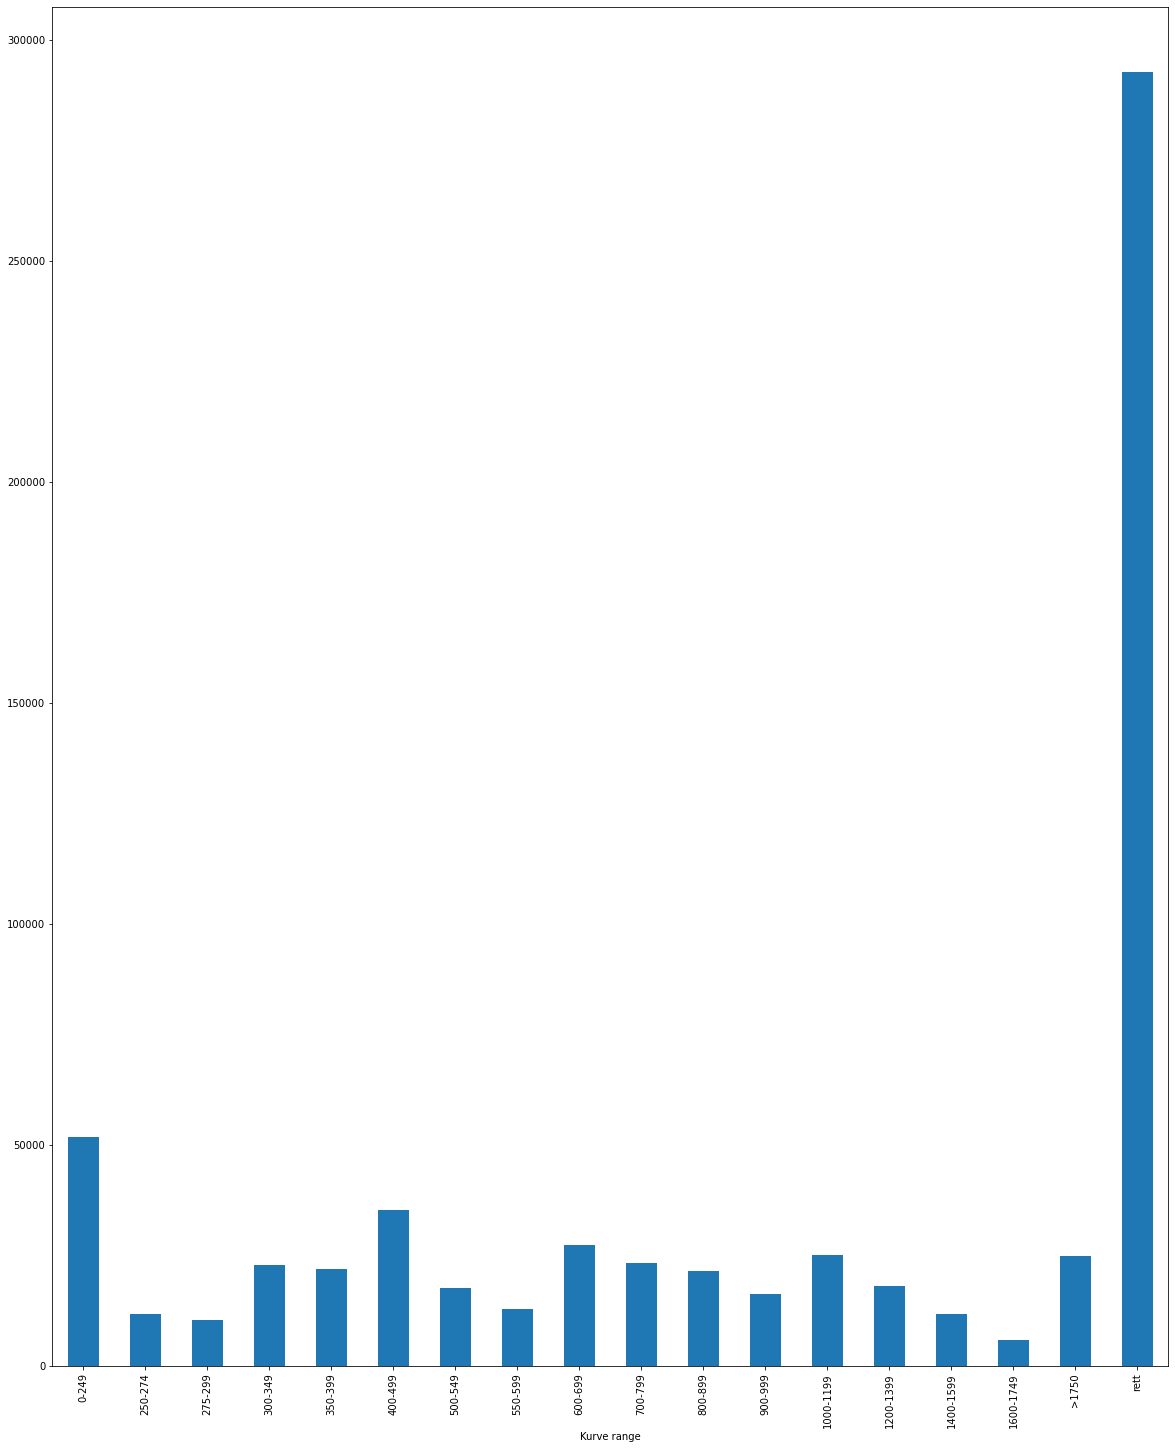

In [50]:
df_kurver['lengde'] = df_kurver['TIL METER'] - df_kurver['FRA METER']
df_kurver['lengde']

#For å sortere X aksen kan man brukes en array med navnene og den rekkefølgen man ønsker kombinert med .loc[names] 

df_kurver.groupby(['Kurve range'])['lengde'].sum().loc[names].plot(kind='bar')



In [62]:
df_kurver['lengde'].sum()/1000

652.394592

In [51]:
df_kurver.groupby(['Kurve range'])['lengde'].sum()

Kurve range
0-249         51739.025
1000-1199     25244.038
1200-1399     18130.872
1400-1599     11871.378
1600-1749      6014.996
250-274       11809.965
275-299       10394.520
300-349       22930.414
350-399       21906.509
400-499       35377.638
500-549       17685.066
550-599       12853.367
600-699       27366.809
700-799       23396.802
800-899       21596.914
900-999       16418.815
>1750         24911.193
rett         292746.271
Name: lengde, dtype: float64